In [21]:
pip install opencv-python==3.4.2.16

In [22]:
pip install opencv-contrib-python==3.4.2.16

In [23]:
import argparse as ap
import cv2
import numpy as np
import os
import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing

from pylab import *

In [24]:
train_path = "/content/train"

training_names = os.listdir(train_path)

numWords = 1000

#
image_paths = []
for training_name in training_names:
    image_path = os.path.join(train_path, training_name)
    image_paths += [image_path]


des_list = []


for i, image_path in enumerate(image_paths):
    im = cv2.imread(image_path)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    print ("Extract SIFT of %s image, %d of %d images" %(training_names[i], i, len(image_paths)))
    
    sift = cv2.xfeatures2d.SIFT_create()
    (kps, des) = sift.detectAndCompute(gray, None)
 
    des_list.append((image_path, des))   
    


# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))  

# Perform k-means clustering
print ("Start k-means: %d words, %d key points" %(numWords, descriptors.shape[0]))
voc, variance = kmeans(descriptors, numWords, 1) 

# Calculate the histogram of features
im_features = np.zeros((len(image_paths), numWords), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

print ("Features =", im_features)
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

# Perform L2 normalization
im_features = im_features*idf
im_features = preprocessing.normalize(im_features, norm='l2')      
    

Extract SIFT of ukbench00050.jpg image, 0 of 56 images
Extract SIFT of ukbench00007.jpg image, 1 of 56 images
Extract SIFT of ukbench00024.jpg image, 2 of 56 images
Extract SIFT of ukbench00042.jpg image, 3 of 56 images
Extract SIFT of ukbench00013.jpg image, 4 of 56 images
Extract SIFT of ukbench00003.jpg image, 5 of 56 images
Extract SIFT of ukbench00023.jpg image, 6 of 56 images
Extract SIFT of ukbench00027.jpg image, 7 of 56 images
Extract SIFT of ukbench00004.jpg image, 8 of 56 images
Extract SIFT of ukbench00046.jpg image, 9 of 56 images
Extract SIFT of ukbench00010.jpg image, 10 of 56 images
Extract SIFT of ukbench00005.jpg image, 11 of 56 images
Extract SIFT of ukbench00018.jpg image, 12 of 56 images
Extract SIFT of ukbench00054.jpg image, 13 of 56 images
Extract SIFT of ukbench00029.jpg image, 14 of 56 images
Extract SIFT of ukbench00032.jpg image, 15 of 56 images
Extract SIFT of ukbench00053.jpg image, 16 of 56 images
Extract SIFT of ukbench00041.jpg image, 17 of 56 images
Ex

In [25]:
from pylab import *

/content/train/ukbench00000.jpg
Ranking =  [[28 27 54  5 34 32 22 10 26 14 37 31 30 17 55  3 39 35 33 15 42  7 12 45
  24 25 18 49 43 36 38 47  2  8  0  1 51 11 23 46 41 52 50  4 53 40 29  9
  44 48 20 19  6 13 21 16]]
0.32432026
index = 0 ID = 28
index = 1 ID = 27
index = 2 ID = 54
index = 3 ID = 5


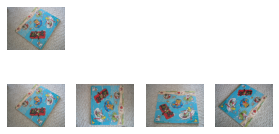

In [26]:
image_path = "/content/train/ukbench00000.jpg"
print (image_path)

# Load the classifier, class names, scaler, number of clusters and vocabulary 


des_list =[]
im = cv2.imread(image_path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
(kps, des) = sift.detectAndCompute(gray, None)

des_list.append((image_path, des))   
    
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]

# 
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

print ("Ranking = ", rank_ID)
print (score[0][49])

# Visualize the results
figure()

subplot(3,5,1)
imshow(im[:,:,::-1])
axis('off')
for i, ID in enumerate(rank_ID[0][0:4]):
     im = cv2.imread(image_paths[ID])
     print ("index =", i, "ID =",ID)
     img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
     subplot(3,5,i+6)
     imshow(img)
     axis('off')
show()  
